In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob

In [27]:
data_dir = "observations/"
planet = "HR8799e"
files = glob(f"{data_dir}{planet}_CHARIS*")
data = []
for f in files:
    data.append(np.genfromtxt(f,delimiter=',').T)
data = np.array(data)
print(data.shape)

(2, 3, 22)


[-6.79824651e-16  1.85442143e-15  3.28642517e-15  2.29550242e-15
  2.84785194e-15  4.25865520e-16  1.20920609e-15  6.83948841e-16
  6.50413302e-16  1.44168402e-15  2.71479288e-15  2.45860611e-15
  2.03209036e-15  4.80708356e-16  1.52376847e-15  1.12907881e-15
  1.50665942e-15  1.95694035e-15  2.31200381e-15  1.76607305e-15
  1.43751089e-15  8.30946843e-16] [1.66060045e-15 1.01321079e-15 8.43831326e-16 7.01345273e-16
 1.05815934e-15 9.74231859e-16 8.09003965e-16 3.65200236e-16
 3.90029855e-16 4.96229424e-16 4.11374458e-16 3.31067877e-16
 2.97669345e-16 4.42664838e-16 6.04549849e-16 2.46181409e-16
 3.30685047e-16 1.63831696e-16 2.12185307e-16 3.68318843e-16
 5.64698194e-16 7.08974997e-16]
[2.11285672e-15 2.24769599e-15 2.79839107e-15 2.52294622e-15
 1.42205633e-15 1.03388861e-15 6.30240404e-16 1.33506558e-15
 1.08229979e-15 1.68762687e-15 3.13821892e-15 2.09406282e-15
 2.24112877e-15 4.71658387e-16 1.36401189e-15 1.36236008e-15
 1.44575377e-15 2.22005283e-15 2.22254158e-15 1.82985264e-15

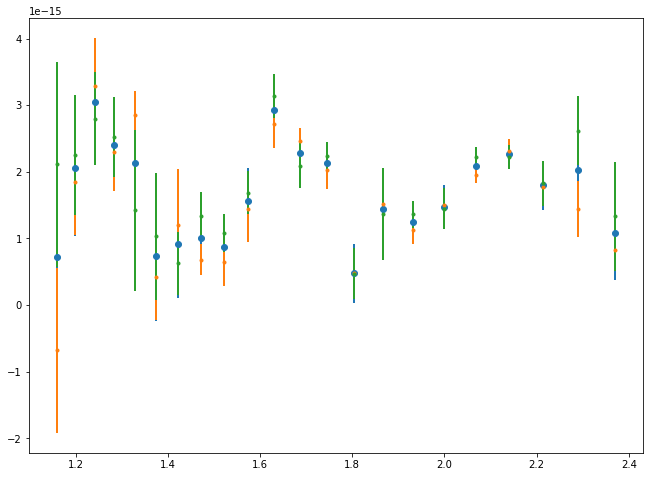

In [28]:
wlens = data[0,0,:]
fluxes = np.mean(data[:,1,:],axis=0)
errs = np.sqrt(np.sum(data[:,2,:]**2,axis=0)/np.sqrt(2))

fig,ax = plt.subplots(figsize=(11,8))
ax.errorbar(wlens,fluxes,yerr=errs,linewidth=0,marker='o',elinewidth=2)
for i,d in enumerate(data):
    print(d[1],errs)
    ax.errorbar(d[0],d[1],yerr=d[2],label = f"Night {i}",linewidth=0,marker = '.',elinewidth=2)
np.savetxt(f"{data_dir}{planet}_CHARIS_average.dat",np.column_stack([wlens,fluxes,errs]))
#